<a href="https://colab.research.google.com/github/KimMunho/ComputerVision/blob/main/HW2/HW2_2020039012_KimMunho_(2_10).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 ### HW2-10

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
원본이미지



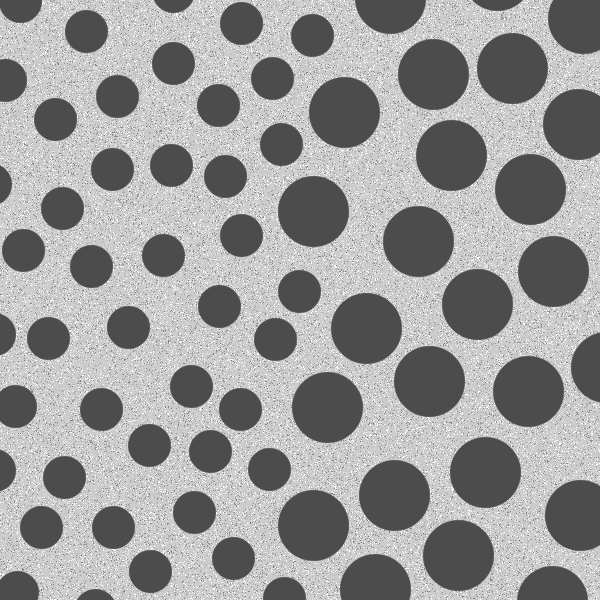

closed



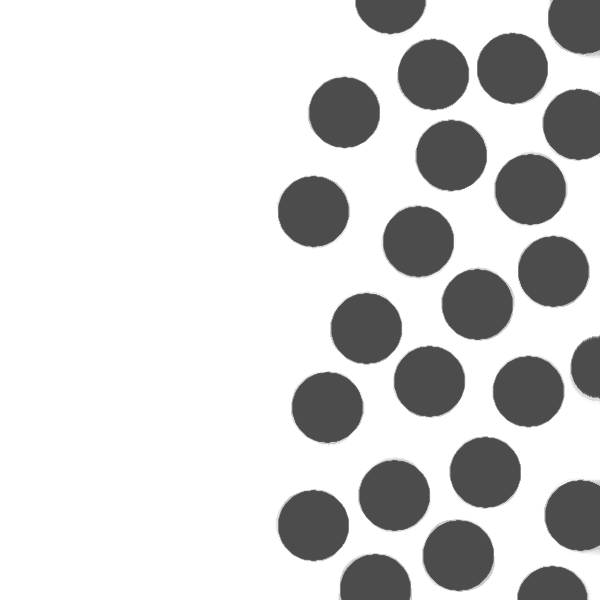

opened



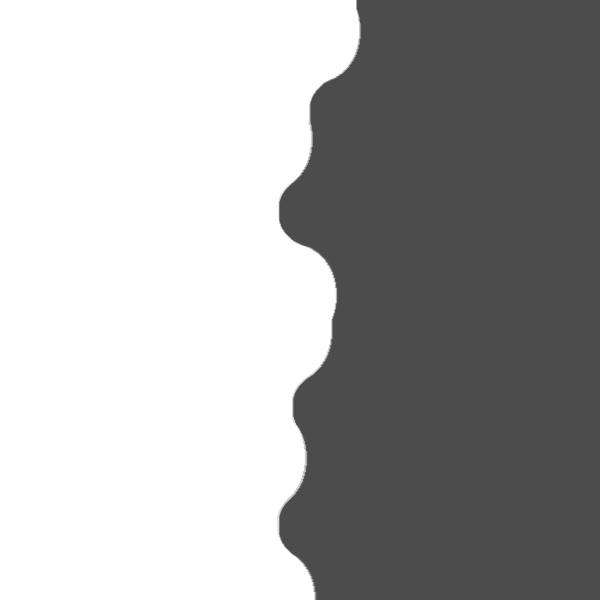

gradient



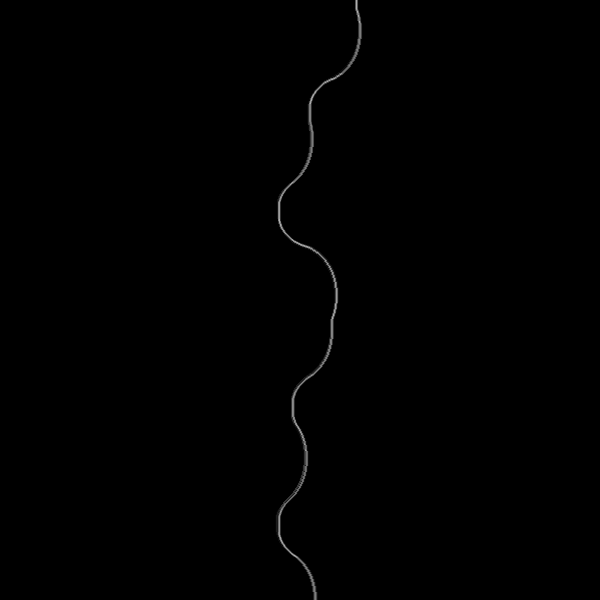

최종 이미지



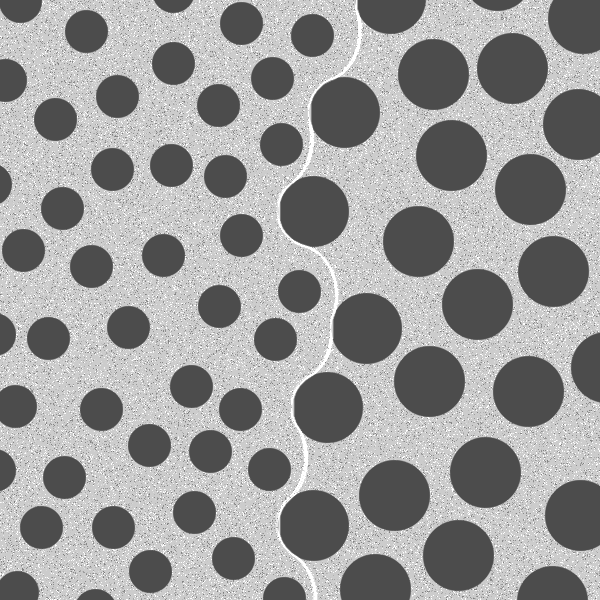

In [ ]:
# OpenCV를 사용하기 위한 초기 설정

import cv2
import numpy as np   # 넘파이 사용
import matplotlib.pyplot as plt   # matplotlib : 시각화라이브러리
from google.colab.patches import cv2_imshow    # colab에서 cv.imshow 사용

# 이미지 불러오기

from google.colab import drive
drive.mount('/content/drive')

img_path = '/content/drive/MyDrive/Colab Notebooks/ComputerVision/HW2/Fig0943(a).tif'
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

if img is None:
    print("Import Failed")

import matplotlib.pyplot as plt

# 원본 이미지
print("원본이미지\n")
cv2_imshow(img)

# 1단계: 작은 얼룩 제거 (closing)
kernel1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (55, 55))
closed = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel1)

print("closed\n")
cv2_imshow(closed)

# 2단계: 배경 패치 제거 (opening)
kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (80, 100))
opened = cv2.morphologyEx(closed, cv2.MORPH_OPEN, kernel2)

print("opened\n")
cv2_imshow(opened)


# 3단계: 경계 추출 (Gradient)
gradient = cv2.morphologyEx(opened, cv2.MORPH_GRADIENT, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)))

print("gradient\n")
cv2_imshow(gradient)

img_color = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

# 4단계: gradient를 원본에 겹쳐서 흑백 밝기 강조
overlay = cv2.add(img, gradient)
print("최종 이미지\n")
cv2_imshow(overlay)

